In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [3]:
# Loading the dataset
df = pd.read_csv("Employee.csv")  

#### Data Exploration

In [4]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [7]:
df.nunique()

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [8]:
#Rename columns
df.columns = ['Company_Name', 'Emp_Age', 'Emp_Salary', 'City', 'Nationality', 'Gender']
df.columns

Index(['Company_Name', 'Emp_Age', 'Emp_Salary', 'City', 'Nationality',
       'Gender'],
      dtype='object')

#### Data Cleaning

In [9]:
# Handling missing value
df.isnull().sum()

Company_Name     8
Emp_Age         18
Emp_Salary      24
City            14
Nationality      0
Gender           0
dtype: int64

In [10]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

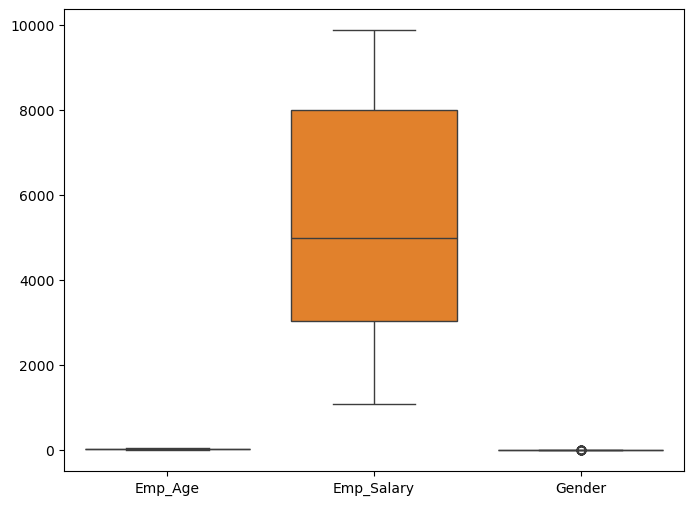

In [11]:
# Find the outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Emp_Age', 'Emp_Salary','Gender']])
plt.show()

In [12]:
# Replace 0 in 'age' column with NaN
df.loc[df['Emp_Age'] == 0, 'Emp_Age'] = np.nan

In [13]:
df.head()

,Company_Name,Emp_Age,Emp_Salary,City,Nationality,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [14]:
# filling the missing values with median of each column
for col in ['Emp_Age','Emp_Salary']:
    df[col] = df[col].fillna(df[col].median())

In [15]:
df.head()

,Company_Name,Emp_Age,Emp_Salary,City,Nationality,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


#### Data Analysis

In [16]:
# Filter data: age > 40 and salary < 5000
filtered_df = df[(df['Emp_Age'] > 40) & (df['Emp_Salary'] < 5000)]
filtered_df

,Company_Name,Emp_Age,Emp_Salary,City,Nationality,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


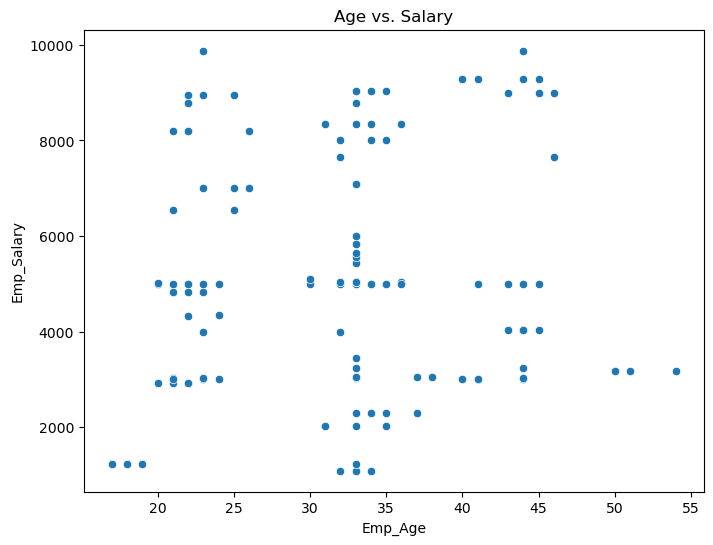

In [17]:
# Plot the chart age and salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Emp_Age', y='Emp_Salary')
plt.title('Age vs. Salary')
plt.xlabel('Emp_Age')
plt.ylabel('Emp_Salary')
plt.show()

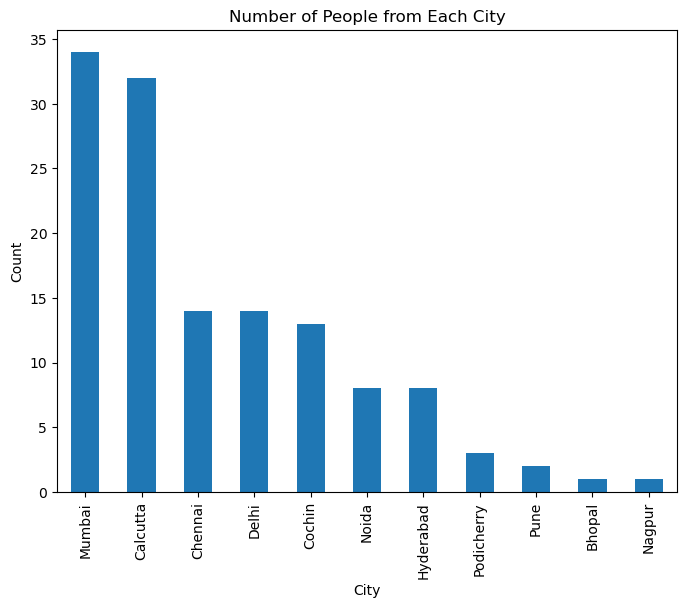

In [18]:
# Count of people from each place
place_counts = df['City'].value_counts()
place_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Number of People from Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

#### Data Encoding

In [19]:
# Convert categorical variables into numerical
df_encoded = pd.get_dummies(df, columns=['Company_Name', 'City', 'Nationality', 'Gender'], drop_first=True)
df_encoded

,Emp_Age,Emp_Salary,Company_Name_Congnizant,Company_Name_Infosys,Company_Name_Infosys Pvt Lmt,Company_Name_TCS,Company_Name_Tata Consultancy Services,City_Calcutta,City_Chennai,City_Cochin,City_Delhi,City_Hyderabad,City_Mumbai,City_Nagpur,City_Noida,City_Podicherry,City_Pune,Gender_1
0,20.0,5000.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
1,30.0,5000.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,35.0,2300.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,23.0,4000.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
143,33.0,9024.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
146,33.0,5034.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


####  Feature Scaling 

In [22]:
# Columns to scale
cols = ['Emp_Age', 'Emp_Salary']

# Standard Scaling
df_standard = df.copy()
df_standard[cols] = StandardScaler().fit_transform(df[cols])

# Min-Max Scaling
df_minmax = df.copy()
df_minmax[cols] = MinMaxScaler().fit_transform(df[cols])

print("Standard Scaled Data:")
print(df_standard.head())

print("Min-Max Scaled Data:")
print(df_minmax.head())


Standard Scaled Data:
  Company_Name   Emp_Age  Emp_Salary      City Nationality  Gender
0          TCS -1.484676   -0.100827   Chennai       India       0
1      Infosys -0.267174   -0.100827    Mumbai       India       0
2          TCS  0.341577   -1.243735  Calcutta       India       0
3      Infosys  0.950328   -0.947426     Delhi       India       0
4          TCS -1.119426   -0.524127    Mumbai       India       0
Min-Max Scaled Data:
  Company_Name   Emp_Age  Emp_Salary      City Nationality  Gender
0          TCS  0.081081    0.445089   Chennai       India       0
1      Infosys  0.351351    0.445089    Mumbai       India       0
2          TCS  0.486486    0.137817  Calcutta       India       0
3      Infosys  0.621622    0.217480     Delhi       India       0
4          TCS  0.162162    0.331285    Mumbai       India       0
